# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Prashant Subramaniam Iyer (49352530)

I have used the following AI tools: Minimal Reference to Bard

I understand that my submission needs to be my own work: PI

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block
```
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb
```

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

This is a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [3]:
def simpleEnvironment(agent, max_steps, verbose = False):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simpleEnvironment(simple_randomized_agent, max_steps = 20)

5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In my Environment:

simple_environment(): It invokes the initialize_environment() and initialize_agent() functions for setting up random dirt in the environment and a random position for an agent respectively. Dirty squares represented by 1, else 0. Further, this environment function controls the parameters passed to the agent. The current bumper values, dirt condition of the current agent square and the current agent location are being passed to the agent function.

Based on these parameters, the agent returns the action and updated location. For every action, the environment considers the energy units used. The environment would stop the agent from any further action either if the agent has exhausted the available energy units or if the agent has completed cleaning the room.

In [8]:
# Your code and description goes here

import random
import numpy as np


def initialize_environment(n,p):
  dirt_squares = [[int(random.random() <p) for _ in range(n)] for _ in range(n)]
  #print(dirt_squares)
  return dirt_squares

def initialize_agent(n):
  agent_row = random.randint(0,n - 1)
  agent_col = random.randint(0, n- 1)
  return agent_row, agent_col

def simple_environment(agent, n,p,max_steps=500, verbose=False):
  dirt_squares = initialize_environment(n,p)
  if (verbose): print("Room: ", dirt_squares)
  agent_row, agent_col = initialize_agent(n)
  total_cost = 0
  cleaned_squares = 0
  if (verbose): print("initial agent position is:", agent_row, agent_col)
  if agent == 'model_reflex':
    while agent_row != 0 or agent_col != 0:
          bumpers = {
                "north": agent_row == 0,
                "south": agent_row == n - 1,
                "west": agent_col == 0,
                "east": agent_col == n - 1
            }
          agent_row, agent_col = reach_start(bumpers, agent_row, agent_col)
          total_cost += 1
    if (verbose):print("Updated positions", agent_row, agent_col)
    if (verbose):print("Cost for updating position is:", total_cost)
  while any(any(row) for row in dirt_squares) and (total_cost < max_steps):
    bumpers = {
          "north": agent_row == 0,
          "south": agent_row == n - 1,
          "west": agent_col == 0,
          "east": agent_col == n - 1
      }
    if agent == 'model_reflex':
      action, agent_row, agent_col = model_reflex_agent(bumpers, dirt_squares[agent_row][agent_col], agent_row, agent_col)
    elif agent == 'simple_reflex':
      action, agent_row, agent_col = simple_reflex_agent(bumpers, dirt_squares[agent_row][agent_col], agent_row, agent_col)
    if (verbose): print(action, agent_row, agent_col)
    if (verbose): print(bumpers)
    total_cost += 1
    if (verbose): print("Current agent positions and action is:", action, agent_row, agent_col)
    if action == 'suck':
      dirt_squares[agent_row][agent_col] = 0
      cleaned_squares +=1
  return total_cost, cleaned_squares

def main():
  n = 5
  p = 0.2
  max_steps = 100

  # #For simple reflex agent
  total_cost, cleaned_squares = simple_environment('simple_reflex',n,p, max_steps)
  print("Final Cost and Number of Squares cleaned are:")
  print(total_cost, cleaned_squares)

  #for model reflex agent
  total_cost, cleaned_squares = simple_environment('model_reflex',n,p, max_steps)
  print("Final Cost and Number of Squares cleaned are:")
  print(total_cost, cleaned_squares)


if __name__ == "__main__":
  main()

Final Cost and Number of Squares cleaned are:
71 7
Final Cost and Number of Squares cleaned are:
32 4


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

For the Simple_Reflex_Agent:

Passed percepts are; bumpers, dirt and agent location from the environment. Based on this information, the agent would randomly select the permitted actions and continue until the environment is clean or the energy is exhausted (represented using total_cost).

In [6]:
def simple_reflex_agent(bumpers,dirty,agent_row,agent_col):
  movements = ['north','south','east','west']
  if dirty == 1:
    return 'suck',agent_row,agent_col
  else:
    while True:
      random_action = np.random.choice(movements)
      if bumpers[random_action]:
        pass
      else:
        if random_action == 'north':
          #print('agent moved north')
          agent_row -= 1
        elif random_action == 'east':
          #print('agent moved east')
          agent_col += 1
        elif random_action == 'west':
          #print('agent moved west')
          agent_col -= 1
        elif random_action == 'south':
          #print('agent moved south')
          agent_row += 1
      return random_action, agent_row, agent_col

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

The following rules and functions have been defined for the execution of the model based reflex agent:

reach_start(): This function ensures that the agent reaches the top left corner before starting with the cleaning and traversing process.

model_reflex_agent(): Once the agent is at the start, based on the bumpers inputs, dirt information and the agent positions, the environment triggers this function until all the squares are cleaned or the energy unit is exhausted (indicated using total_cost).

In [7]:
def reach_start(bumpers, agent_row, agent_col):
  if bumpers['west'] == False:
    #print('West', bumpers['west'])
    agent_col -= 1
  elif bumpers['north'] == False:
    #print('North', bumpers['north'])
    agent_row -= 1
  return agent_row, agent_col


def model_reflex_agent(bumpers, dirty, agent_row, agent_col):
    movements = ['north', 'south', 'east', 'west']
    is_even_column = agent_col % 2 == 0
    direction = 'south' if is_even_column else 'north'

    if dirty == 1:
        return 'suck', agent_row, agent_col
    elif bumpers[direction]: #if agent encounters north or south
        #print('bumpers', bumpers[direction])
        return 'east', agent_row, agent_col + 1  # Move to next column when at north or south most cell
    else:
        #print('Not yet at the top or bottom most cell')
        next_row = agent_row + 1 if direction == 'south' else agent_row - 1
        return direction, next_row, agent_col

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

**Primary Perfomance Measure Metric:** As metioned in the PEAS description, I have considered the total_cost across the runs for understanding the energy usage of the agents. This helps us gauge an understanding on which agent utilizes most of the available energy and which effeciently cleans whole room up in the given energy units.

In [26]:
import pandas as pd
def perfomance_measure():
    sizes = [5, 10, 100]
    max_steps = [125, 500, 50000]  # 5 times the max steps needed to walk through the grid
    p = 0.2
    runs = 100

    column_names = ['size', 'random', 'simple','model']
    output_df = pd.DataFrame(columns=column_names)
    output_df['size'] = ['5x5','10x10','100x100']
    for i in range(len(sizes)):
        total_cost_random = 0
        total_cost_simple_reflex = 0
        total_cost_model_reflex = 0

        cleaned_squares_random = 0
        cleaned_squares_simple_reflex = 0
        cleaned_squares_model_reflex = 0

        for _ in range(runs):
            # For Random
            total_cost = max_steps[i]
            cleaned_squares = simpleEnvironment(simple_randomized_agent, max_steps[i])
            total_cost_random += total_cost
            cleaned_squares_random += cleaned_squares

            #For Simple Reflex Agent
            total_cost, cleaned_squares = simple_environment('simple_reflex', sizes[i], p, max_steps[i])
            total_cost_simple_reflex += total_cost
            cleaned_squares_simple_reflex += cleaned_squares


            # For Model Reflex Agent
            total_cost, cleaned_squares = simple_environment('model_reflex', sizes[i], p, max_steps[i])
            total_cost_model_reflex += total_cost
            cleaned_squares_model_reflex += cleaned_squares

            size_label = f"{sizes[i]}x{sizes[i]}"

            output_df.loc[output_df['size'] == size_label, 'random'] = total_cost_random
            output_df.loc[output_df['size'] == size_label, 'simple'] = total_cost_simple_reflex
            output_df.loc[output_df['size'] == size_label, 'model'] = total_cost_model_reflex
    return output_df

output_df = perfomance_measure()
output_df

,size,random,simple,model
0,5x5,12500,9711,2880
1,10x10,50000,49508,12382
2,100x100,5000000,5000000,1209300


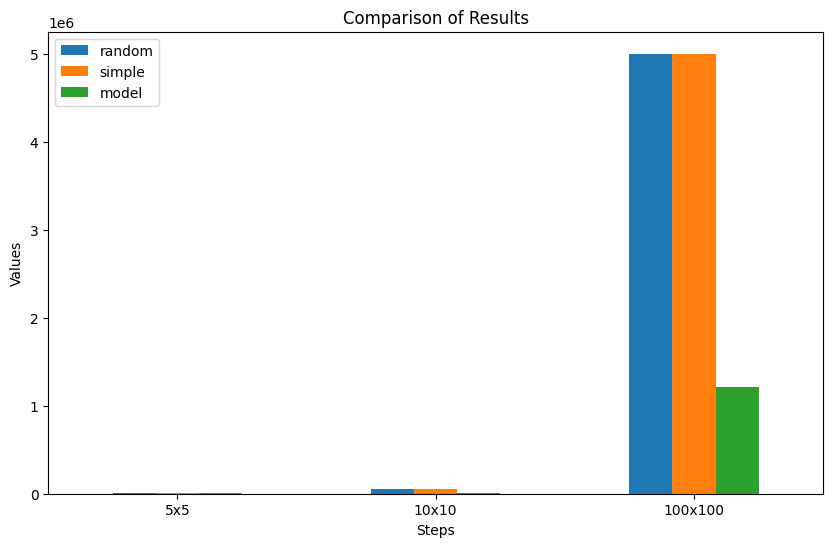

In [27]:
import matplotlib.pyplot as plt

output_df.set_index('size', inplace=True)

output_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Results')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

Analysis: When we compare Random v/s Simple Reflex v/s Model Reflex agents in terms of cost or energy units uitlized, from the table and graph, we can observe that the as the room size increases, Random Agent and the Simple Reflex Agent appear to be using all of the energy sources with no guarantee of getting the room cleaned. On the other hand, the model reflex agent looks to be effecient and guarantees a clean room in the given energy units as it ensures, all the cells are traversed. It spends the extra energy to navigate to the top left and then begin the cleaning in a row by row, col by col pattern.

**Additional Measure:**

As an additional view point to understand the performance of these models, I have also considered a weighted scores based on the cleaned steps and total cost (energy units used)

I considered equal weights to both cost and clean factors.

Lower the value of this measure, better is the model as it indicates it has the best performance in terms of minimizing the total cost utilized and maximising the number of squares cleaned at the same time. This difference can mainly be observed, as the dimensions of the room increases as without any directed rules and direction, it becomes difficult for the the random agent the simple reflex agent to traverse and clean the room.

In [29]:
import pandas as pd
def get_performance_matrix():
    sizes = [5, 10, 100]
    max_steps = [125, 500, 50000] # 5 times the max steps needed to walk through the grid
    p = 0.2
    runs = 100

    column_names = ['size', 'random', 'simple','model']
    output_df = pd.DataFrame(columns=column_names)
    output_df['size'] = ['5x5','10x10','100x100']
    #print(output_df)
    for i in range(len(sizes)):
        total_cost_random = 0
        cleaned_squares_random = 0
        total_cost_simple_reflex = 0
        cleaned_squares_simple_reflex = 0
        total_cost_model_reflex = 0
        cleaned_squares_model_reflex = 0

        for _ in range(runs):
            # For Random
            total_cost = max_steps[i]
            cleaned_squares = simpleEnvironment(simple_randomized_agent, max_steps[i])
            total_cost_random += total_cost
            cleaned_squares_random += cleaned_squares

            # For Simple Reflex Agent
            total_cost, cleaned_squares = simple_environment('simple_reflex', sizes[i], p, max_steps[i])
            total_cost_simple_reflex += total_cost
            cleaned_squares_simple_reflex += cleaned_squares

            # For Model Reflex Agent
            total_cost, cleaned_squares = simple_environment('model_reflex', sizes[i], p, max_steps[i])
            total_cost_model_reflex += total_cost
            cleaned_squares_model_reflex += cleaned_squares

        avg_cost_random = total_cost_random / runs
        avg_cleaned_squares_random = cleaned_squares_random / runs
        avg_cost_simple_reflex = total_cost_simple_reflex / runs
        avg_cleaned_squares_simple_reflex = cleaned_squares_simple_reflex / runs
        avg_cost_model_reflex = total_cost_model_reflex / runs
        avg_cleaned_squares_model_reflex = cleaned_squares_model_reflex / runs

        # Equal weights for cost to clean and the no. of cleaned squares
        weight_cost = 0.5
        weight_squares = 0.5

        # Function
        def performance_measure(avg_cost, avg_cleaned_squares):
            return (weight_cost * avg_cost) + (weight_squares * avg_cleaned_squares)

        # Weighted scores for each agent
        weighted_score_random = performance_measure(avg_cost_random, avg_cleaned_squares_random)
        weighted_score_simple_reflex = performance_measure(avg_cost_simple_reflex, avg_cleaned_squares_simple_reflex)
        weighted_score_model_reflex = performance_measure(avg_cost_model_reflex, avg_cleaned_squares_model_reflex)

        size_label = f"{sizes[i]}x{sizes[i]}"

        output_df.loc[output_df['size'] == size_label, 'random'] = weighted_score_random
        output_df.loc[output_df['size'] == size_label, 'simple'] = weighted_score_simple_reflex
        output_df.loc[output_df['size'] == size_label, 'model'] = weighted_score_model_reflex


    return output_df

output_df = get_performance_matrix()
output_df

,size,random,simple,model
0,5x5,74.77,48.77,16.985
1,10x10,300.29,252.695,72.655
2,100x100,29998.38,25683.515,7040.51


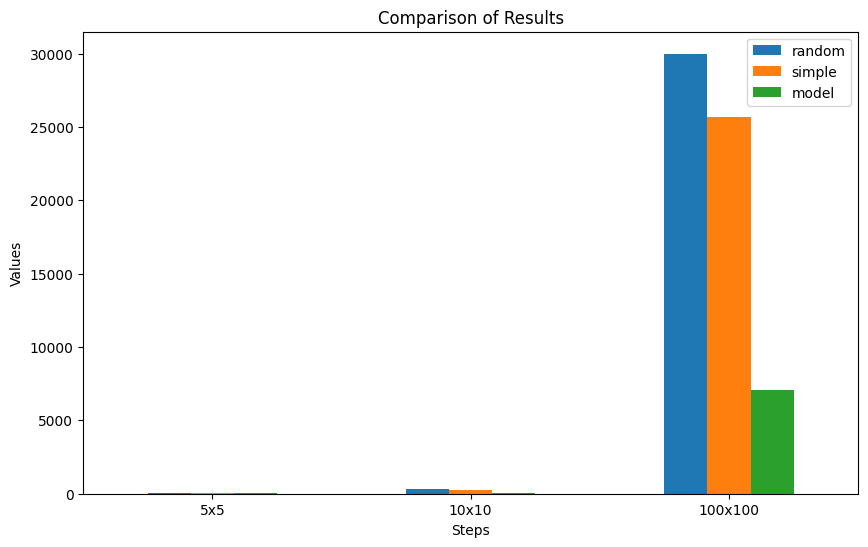

In [30]:
output_df.set_index('size', inplace=True)

output_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Results')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

In [ ]:
# Your graphs and discussion of the results goes here

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

##**Answer:**
1. **if it is put into a rectangular room with unknown size:**
**Random Agent:** A random agent will still just randomly run till the energy units have been exhausted as it has no idea if the room has been fully cleaned or not. It may or may not clean the whole room.

**Simple Reflex Agent:** A simple reflex agent will do the cleaning irrespective of the size of the rectangular room. It would identify the walls using the bumper sensors. It would run either until the room is clean or energy is exhausted. It might not be effecient, but there are chances it would fully clean the room.

**Model Reflex Agent:** The current model reflex agent would work only for a square room based on its definition. But given we edit and have an option for entering the rows and columns, the model reflex agent would be able to clean the room given the room size is fixed like in this case (rectangle). It first identifies the left most- top corner cell. Given, we are able to locate that walls using the bumper sensors and the current agent position, the agent would be able to clean the room, as it would be passing through row by row, column by column irrespective of the dimensions

2. **if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms)**

**Random Agent:** A random agent will still just randomly run till the energy units have been exhausted as it has no idea if the enivornment has been fully cleaned or not. It may or may not clean the whole room.

**Simple Reflex Agent:** A simple reflex agent will do the cleaning irrespective of shape of the room. It would identify the walls using the bumper sensors. It would run either until the room is clean or energy is exhausted. It might not be effecient, but there are chances it would fully clean the room.

**Model Reflex Agent:** For a model reflex agent, as the shape is irregular, it might not be able to clean the room. We must have definite/symmetric walls defined to get to the first cell of the room and do the cleaning by traversing in a fixed direction.

3. **if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).**

**Random Agent:** A random agent will still just randomly run till the energy units have been exhausted as it has no idea if the enivornment has been fully cleaned or not. No gurantee that the room would be cleaned fully

**Simple Reflex Agent:** A simple reflex agent will do the cleaning irrespective of any obstacles present in the room. It would treat the obstacle just like a wall and move in any other random direction with the help of the bumper sensors. It would run either until the room is clean or energy is exhausted. It might not be effecient, but there are chances it would fully clean the room.

**Model Reflex Agent:** For a model reflex agent, if obstacles are placed, it might not be able to clean the whole room. It would think of these obstacles as walls and act by the defined rules for walls. It might run into a deadlock state too. We may or may not get a clean room. We need to add additional functionalities to identify these obstacles and have rules defined to avoid and clean the room without missing any cell.




## Advanced task: Obstacles

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

In [70]:
# Your code and discussion goes here

import random
import numpy as np

def initialize_environment(n, p_dirt, p_obstacle):
    dirt_squares = [[int(random.random() < p_dirt) for _ in range(n)] for _ in range(n)]
    obstacles = [[int(random.random() < p_obstacle) for _ in range(n)] for _ in range(n)]
    return dirt_squares, obstacles

def simple_environment(agent, n, p_dirt, p_obstacle, max_steps=500):
    dirt_squares, obstacles = initialize_environment(n, p_dirt, p_obstacle)
    agent_row, agent_col = initialize_agent(n)
    total_cost = 0
    cleaned_squares = 0

    while any(any(row) for row in dirt_squares) and (total_cost < max_steps):
        bumpers = {
           "north": agent_row == 0 or obstacles[agent_row - 1][agent_col],
            "south": agent_row == n - 1 or obstacles[agent_row + 1][agent_col],
            "west": agent_col == 0 or obstacles[agent_row][agent_col - 1],
            "east": agent_col == n - 1 or obstacles[agent_row][agent_col + 1]
        }
        if agent == 'model_reflex':
            action, agent_row, agent_col = model_reflex_agent(bumpers, dirt_squares[agent_row][agent_col], agent_row, agent_col)
        elif agent == 'simple_reflex':
            action, agent_row, agent_col = simple_reflex_agent(bumpers, dirt_squares[agent_row][agent_col], agent_row, agent_col)
        total_cost += 1
        if action == 'suck':
            cleaned_squares += 1
            dirt_squares[agent_row][agent_col] = 0
    return total_cost, cleaned_squares

def main():
    n = 5
    p_dirt = 0.2
    p_obstacle = 0.2
    max_steps = 300 # Tried with  a higher available energy to observe it effects the results.

    # For simple reflex agent
    total_cost, cleaned_squares = simple_environment('simple_reflex', n, p_dirt, p_obstacle, max_steps)
    print("Final Cost and Number of Squares cleaned for simple reflex agent:")
    print(total_cost, cleaned_squares)

    # For model reflex agent
    total_cost, cleaned_squares = simple_environment('model_reflex', n, p_dirt, p_obstacle, max_steps)
    print("Final Cost and Number of Squares cleaned for model reflex agent:")
    print(total_cost, cleaned_squares)

if __name__ == "__main__":
    main()


Final Cost and Number of Squares cleaned for simple reflex agent:
180 5
Final Cost and Number of Squares cleaned for model reflex agent:
300 0


We have added an addtional obstacle trigger to the same bumper sensors.

Analysis:

For Simple Reflex Agent: The agent was able to clean all the squares even with obstacles (as it ended before the all the steps were completed). Though, there is no guarantee this would happen each time. It is just based on the energy units (cost) vs number of squares to the be cleaned and their random positioning

For Model Reflex Agent: The agent was not able to clean any square in this case. It probably got stuck in a deadlock situation or the last cell where it just kept going around in the same pattern or waiting until the energy was exhausted as bumpers were triggered even when there were obstacles and not walls. The agent changes the direction thinking it to be wall, resulting in an incorrect path for the agent. Also, just increasing the energy units available won't guarantee that the room would be cleaned.

For overcoming this problem in Model Reflex Agent, we might need to make the following changes:

1. Have a separate identifiers for the obstacles from the walls.
2. Given an obstacle is encountered:

   a. Just re-reoute the obstacle and continue based on the agent's position until a wall is encountered to trigger the next move.

   b. Trigger a simple reflex agent that moves randomly in the grid.

   c. Maintaing a mapping of what action to perform depending on the position of the obstacle ( Might be complex and hard to maintain)
3. Complete the task based on the one of the above mentioned actions.

I think, once a obstacle is encountered, switching over to a simple reflex agent might be a better approach has it would atleast clean the whole room given we have sufficient energy units. Also, as an added condition, if there are obstacles above a set threshold in the environment, we must directly begin as a simple reflex agent to have a better shot at cleaning the room with the limited energy units.

In [31]:
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html /content/drive/MyDrive/Reach_Start_model_Final_robot_vacuum.ipynb

Mounted at /content/drive
[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Reach_Start_model_Final_robot_vacuum.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of 

In [36]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Robot_Vacuum.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Robot_Vacuum.ipynb to html
[NbConvertApp] Writing 755740 bytes to /content/drive/MyDrive/Colab Notebooks/Robot_Vacuum.html


## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code